# CellMap for pancreas endocrine cell data

The tutorial for pancreas endocrine cell data ([Bastidas et al., 2019](https://doi.org/10.1242/dev.173849)).

# Input & preprpcessing

In [1]:
import cellmap
import numpy as np
import scanpy

The dataset is installed using the [scvelo](https://scvelo.readthedocs.io/en/stable/) package. 

In [2]:
import scvelo as scv
adata = scv.datasets.pancreas()
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

## Noise reduction by [RECODE](https://github.com/yusuke-imoto-lab/RECODE).

start RECODE for scRNA-seq data
end RECODE for scRNA-seq
log: {'seq_target': 'RNA', '#significant genes': 10602, '#non-significant genes': 7148, '#silent genes': 10248, 'ell': 100, 'Elapsed time': '0h 0m 26s 293ms', 'stat_learning': False, '#test_data': 739}


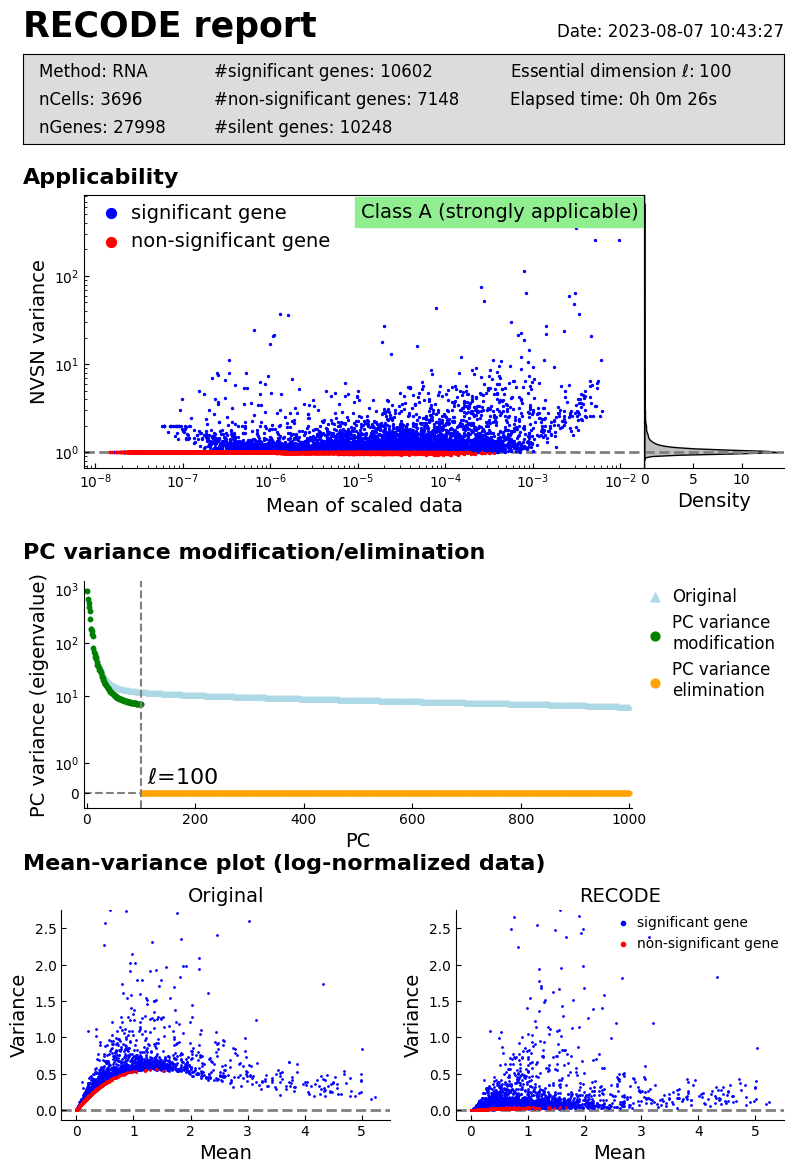

In [3]:
import screcode
recode = screcode.RECODE()
adata.layers['RECODE'] = recode.fit_transform(adata.X.toarray())
adata.layers['RECODE_log'] = np.log(1e4*adata.layers['RECODE'].T/np.sum(adata.layers['RECODE'],axis=1)+1).T
recode.report()

## Log transformtaion

In [4]:
scanpy.pp.normalize_total(adata, target_sum=1e4)
scanpy.pp.log1p(adata)

## RNA velocity

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:04) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:04) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:14) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:01:26) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


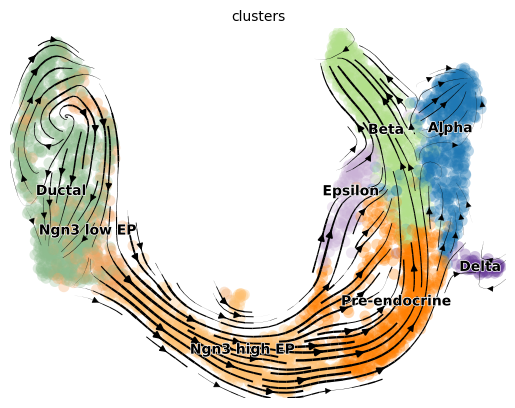

In [5]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)
scv.tl.velocity(adata,mode='stochastic')
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata)

# Hodge decomposition

In [6]:
cellmap.Hodge_decomposition(adata)

{'Contribution_ratio': {'Potential': '61.52%', 'Rotation': '38.48%'}}


## View flows

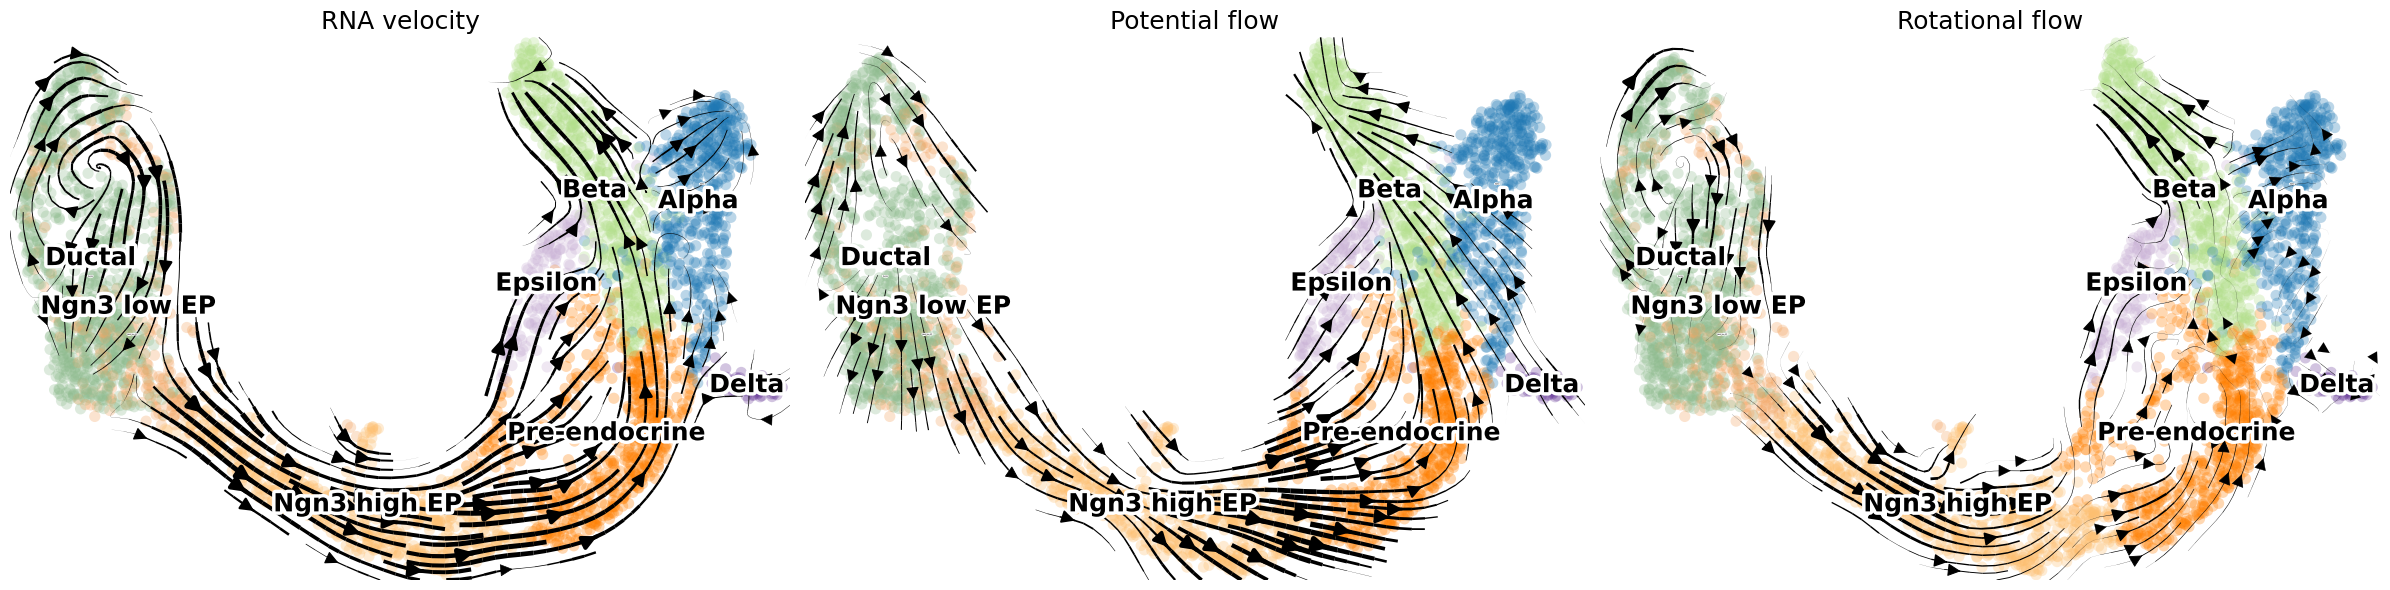

In [7]:
cellmap.view_stream(adata)

## View orbits

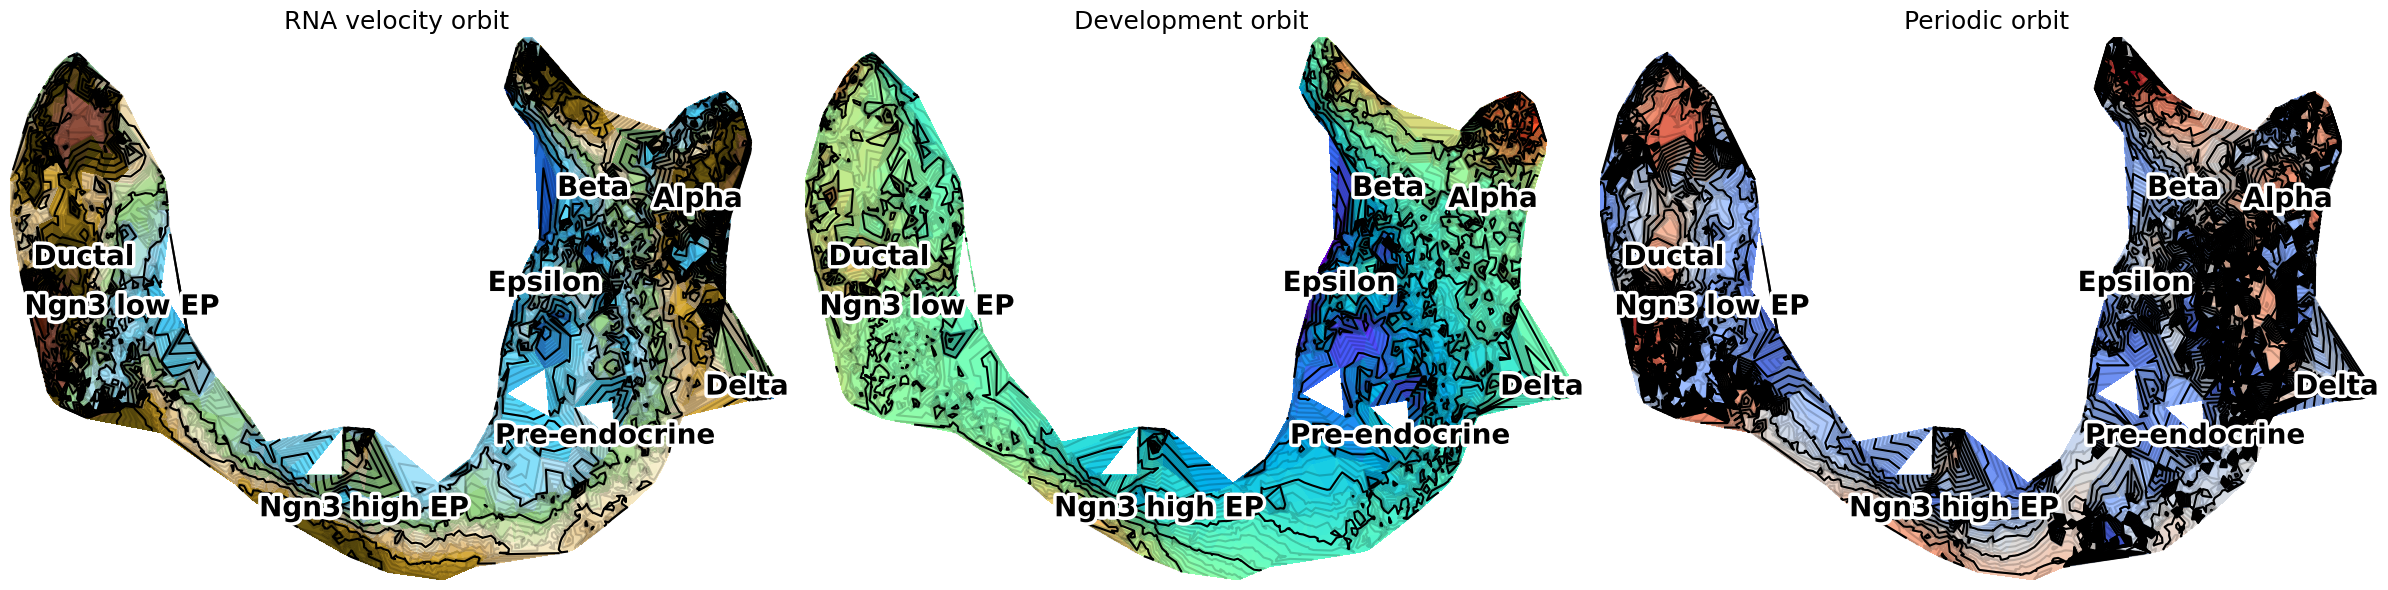

In [8]:
cellmap.view_stream_line(adata)

## View Hodge potential

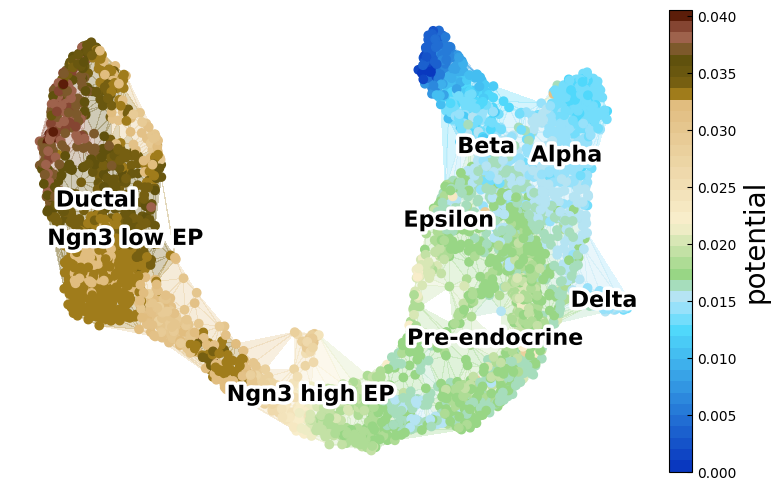

In [9]:
cellmap.view(adata,show_graph = True,cluster_key = 'clusters')

## View Hodge potential 3D

In [10]:
cellmap.view_3D(adata,cluster_key ='clusters',elev=50,azim=65)

## Write for [CellMap viewer](https://github.com/yusuke-imoto-lab/CellMapViewer). 

In [11]:
cellmap.write(adata,filename='CellMap_tutorial_pancreas',exp_key='RECODE_log')

succeeded in writing CellMapp data as "CellMap_tutorial_pancreas.csv"
You can visualize the CDV file by CellMapp viewer https://yusuke-imoto-lab.github.io/CellMapViewer/CellMapViewer/viewer.html


X         Y  Potential     Annotation      Rotation  \
CellID                                                                          
AAACCTGAGAGGGATA   6.143066 -0.063644   0.017507  Pre-endocrine  5.344466e-16   
AAACCTGAGCCTTGAT  -9.906417  0.197778   0.032462         Ductal -1.810054e-15   
AAACCTGAGGCAATTA   7.559791  0.583762   0.015844          Alpha -6.063509e-16   
AAACCTGCATCATCCC -11.283765  4.218998   0.037277         Ductal -1.063364e-15   
AAACCTGGTAAGTGGC   1.721565 -4.753407   0.016075   Ngn3 high EP  6.752411e-17   
...                     ...       ...        ...            ...           ...   
TTTGTCAAGTGACATA   4.768472 -1.388353   0.015252  Pre-endocrine -1.098307e-16   
TTTGTCAAGTGTGGCA  -1.873335 -4.182650   0.019630   Ngn3 high EP -1.595946e-17   
TTTGTCAGTTGTTTGG  -9.882250 -0.105594   0.032622         Ductal -4.440892e-17   
TTTGTCATCGAATGCT   6.612424  4.531895   0.014413          Alpha  2.232612e-17   
TTTGTCATCTGTTTGT   3.071043  1.120432   0.016413        Epsilon  6.349088e-17   

                  Streamline_Original  Streamline_Potential  \
CellID                                                        
AAACCTGAGAGGGATA             0.408151              0.408151   
AAACCTGAGCCTTGAT             0.612502              0.612502   
AAACCTGAGGCAATTA             0.530679              0.530679   
AAACCTGCATCATCCC             0.703180              0.703180   
AAACCTGGTAAGTGGC             0.502965              0.502965   
...                               ...                   ...   
TTTGTCAAGTGACATA             0.066539              0.066539   
TTTGTCAAGTGTGGCA             0.506574              0.506574   
TTTGTCAGTTGTTTGG             0.612377              0.612377   
TTTGTCATCGAATGCT             0.662593              0.662593   
TTTGTCATCTGTTTGT             0.441981              0.441981   

                  Streamline_Rotation  Vorticity_Original  \
CellID                                                      
AAACCTGAGAGGGATA             0.591057           -0.586004   
AAACCTGAGCCTTGAT             0.262876            1.243819   
AAACCTGAGGCAATTA             0.187828           -0.241916   
AAACCTGCATCATCCC             0.463317           -0.292936   
AAACCTGGTAAGTGGC             0.426462            0.012616   
...                               ...                 ...   
TTTGTCAAGTGACATA             0.193388           38.236569   
TTTGTCAAGTGTGGCA             0.347550            0.401369   
TTTGTCAGTTGTTTGG             0.283697            1.327507   
TTTGTCATCGAATGCT             0.242614           16.273183   
TTTGTCATCTGTTTGT             0.404878           -1.587516   

                  Vorticity_Potential  ...   HVG_Npy  HVG_Krtap17-1  HVG_Gast  \
CellID                                 ...                                      
AAACCTGAGAGGGATA            -0.586004  ...  0.202556       0.815123  0.000000   
AAACCTGAGCCTTGAT             1.243819  ...  0.000000       0.000000  0.487266   
AAACCTGAGGCAATTA            -0.241916  ...  0.000000       0.000000  2.267041   
AAACCTGCATCATCCC            -0.292936  ...  0.000000       0.000000  0.000000   
AAACCTGGTAAGTGGC             0.012616  ...  0.000000       0.000000  0.418264   
...                               ...  ...       ...            ...       ...   
TTTGTCAAGTGACATA            38.236569  ...  0.000000       0.311312  0.116789   
TTTGTCAAGTGTGGCA             0.401369  ...  0.654389       1.118192  0.000000   
TTTGTCAGTTGTTTGG             1.327507  ...  0.349560       0.000000  0.200447   
TTTGTCATCGAATGCT            16.273183  ...  0.183375       0.351712  2.113241   
TTTGTCATCTGTTTGT            -1.587516  ...  0.000000       0.000000  0.759684   

                   HVG_Ppy  HVG_8430408G22Rik  HVG_Ppp1r1a  HVG_Peg10  \
CellID                                                                  
AAACCTGAGAGGGATA  0.000000           0.000000     0.071403   0.000000   
AAACCTGAGCCTTGAT  1.122035           1.059910     0.338856   0.588133   
AAACCTGAGGCA

# Dynamical analysis

## Single-cell trajectory

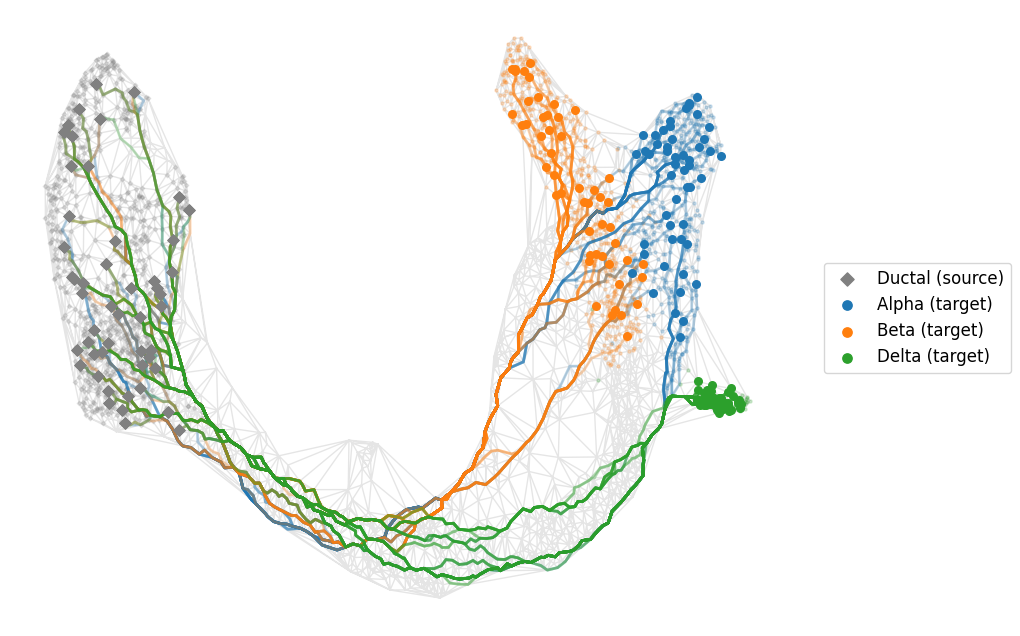

In [12]:
source_cluster = 'Ductal'
target_clusters = ['Alpha','Beta','Delta']
cellmap.view_trajectory(adata,source_cluster,target_clusters)

## Gene expression dynamics

In [13]:
cellmap.calc_gene_dynamics(adata,source_cluster,target_clusters)

Done the computation of gene dynamics


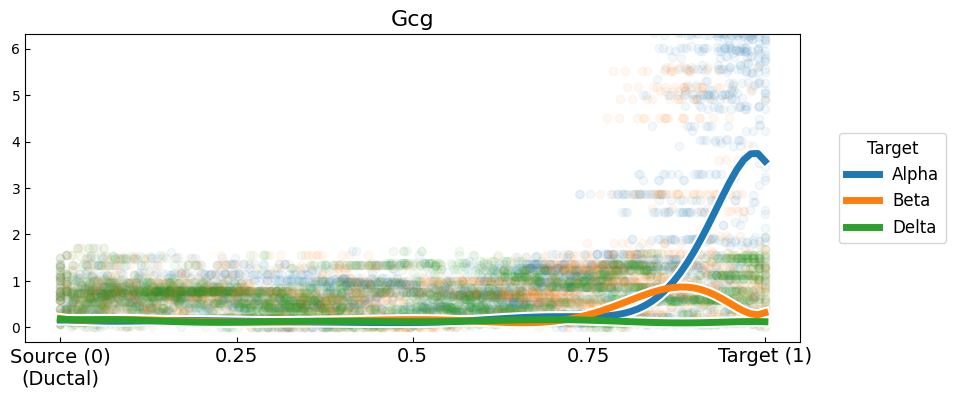

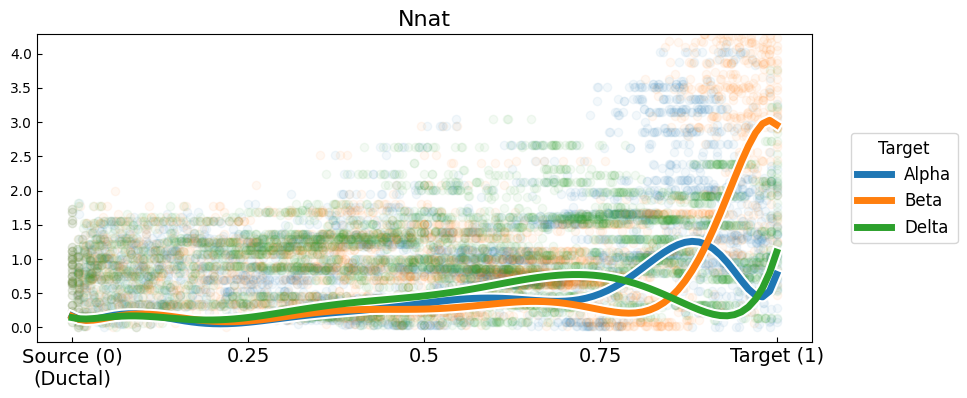

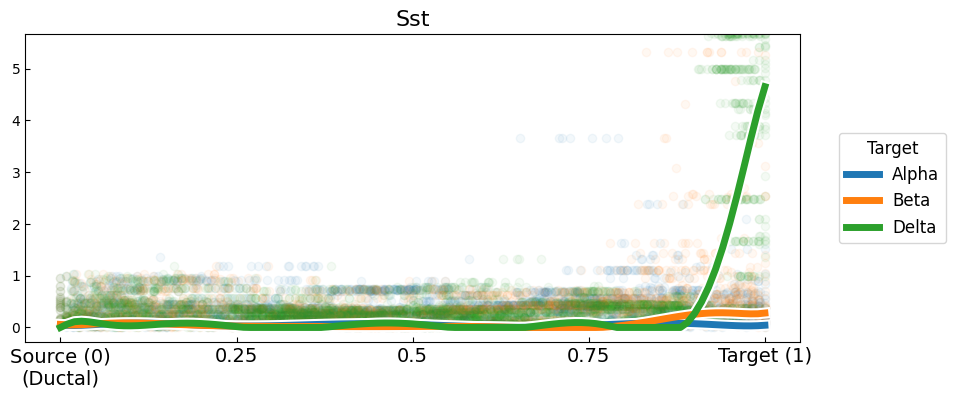

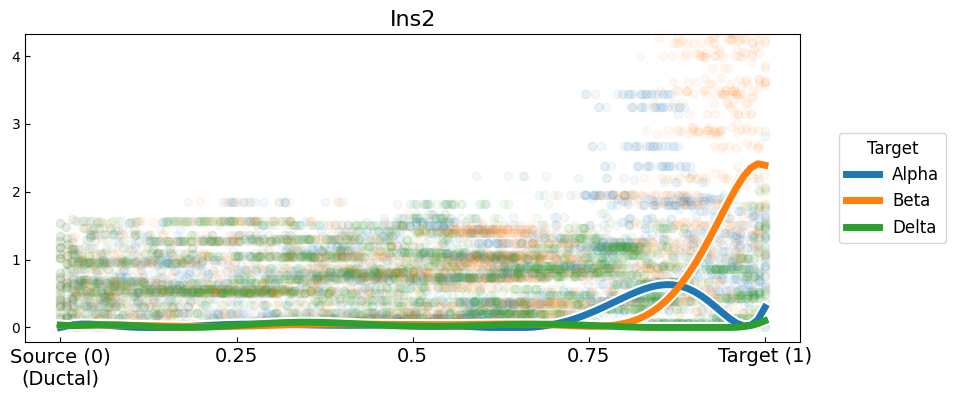

In [14]:
genes = ['Gcg','Nnat','Sst','Ins2'] 
cellmap.gene_dynamics_plot(adata,source_cluster,target_clusters,genes,exp_key='RECODE_log')

## Bifurcation diagram

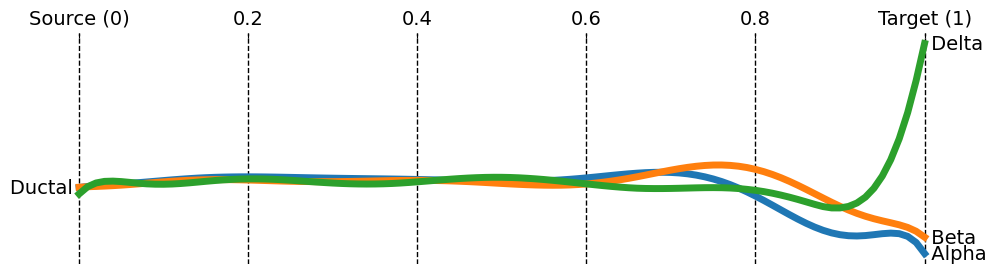

In [15]:
cellmap.bifurcation_diagram(adata,source_cluster,target_clusters)

## DEG dynamics

In [16]:
cellmap.DEG_dynamics(adata,source_cluster,target_clusters,
                     show=False,save=True,
                     save_dir="output",save_filename="DEG_dynamics_pancreas")


Saving gif animation as output/DEG_dynamics_pancreas_Alpha_Beta.gif...
...computing Alpha vs Beta (1/3) 101/101
Saving gif animation as output/DEG_dynamics_pancreas_Alpha_Delta.gif...
...computing Alpha vs Delta (2/3) 101/101
Saving gif animation as output/DEG_dynamics_pancreas_Beta_Delta.gif...
...computing Beta vs Delta (3/3) 101/101

## Key gene dynamics

Alpha_vs_Beta            Alpha_vs_Delta             Beta_vs_Delta           
           gene Alpha Beta           gene Alpha Delta          gene Beta Delta
1          Nnat     -    +          Pcsk2     +     -        Dbpht2    +     -
2         Gng12     -    +           Hhex     -     +          Cct4    -     +
3       Laptm4a     -    +         Tmem27     +     -        Tmem27    +     -
4          Pdx1     -    +          Clic1     -     +       Slc38a5    +     -

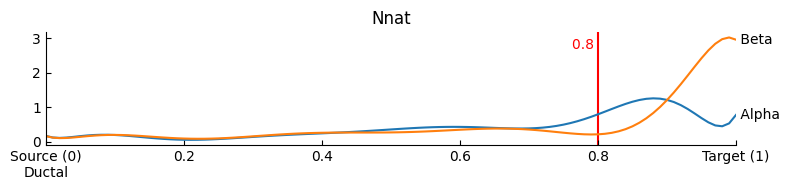

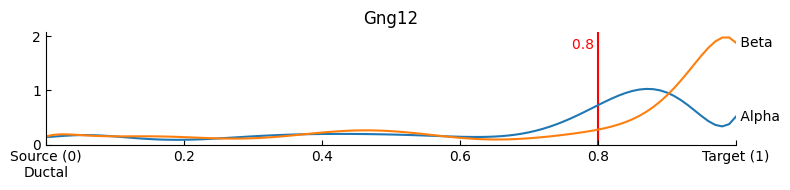

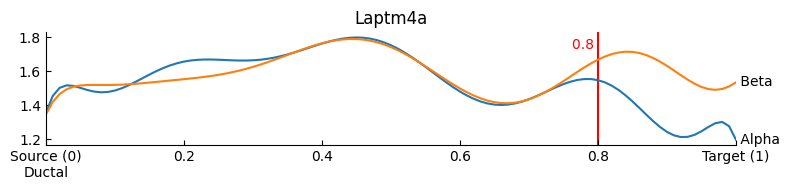

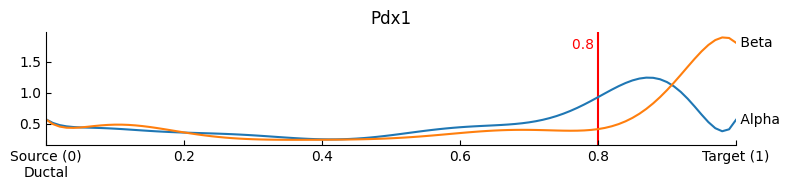

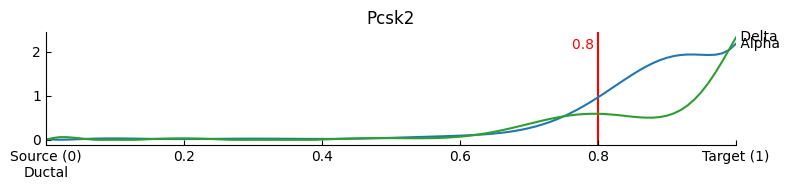

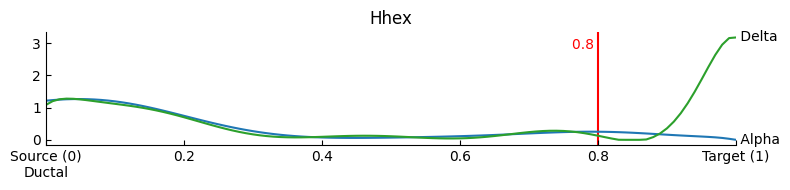

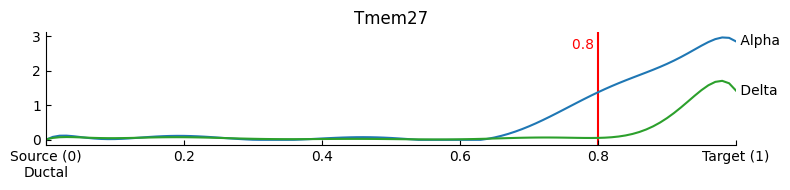

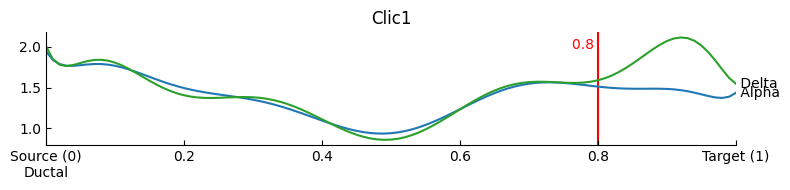

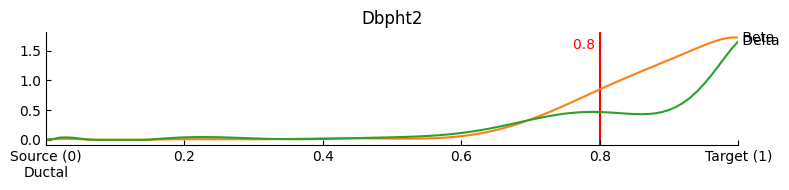

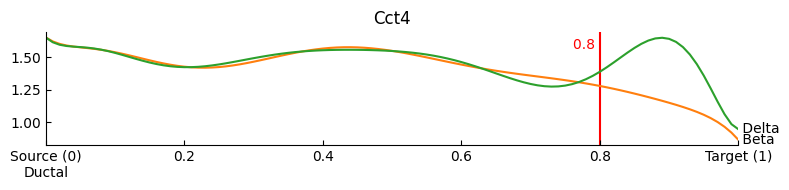

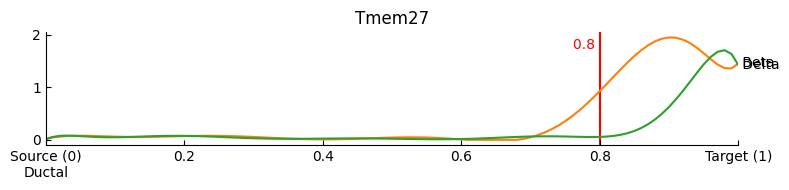

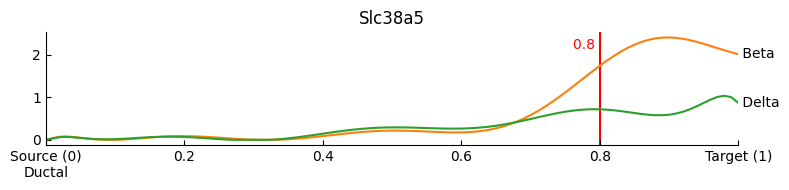

In [17]:
cellmap.key_gene_dynamics(adata,source_cluster,target_clusters,n_genes=4,time=0.8)

## GRN infernece

In [18]:
cellmap.calc_GRN(adata,source_cluster,target_clusters,exp_key='RECODE_log')

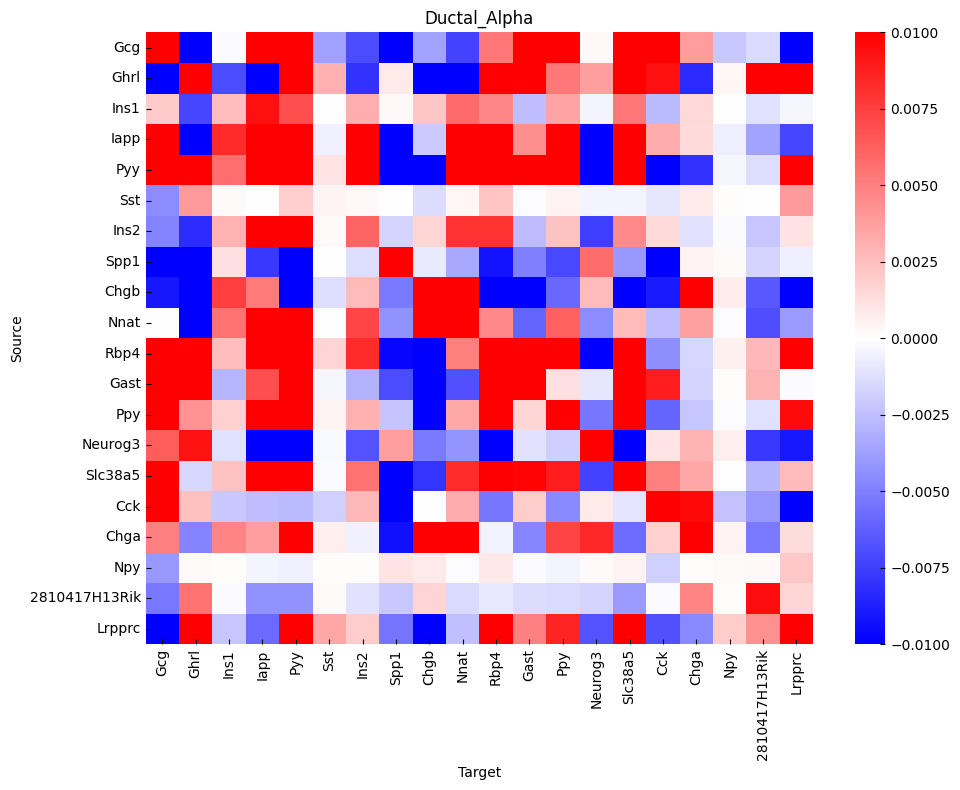

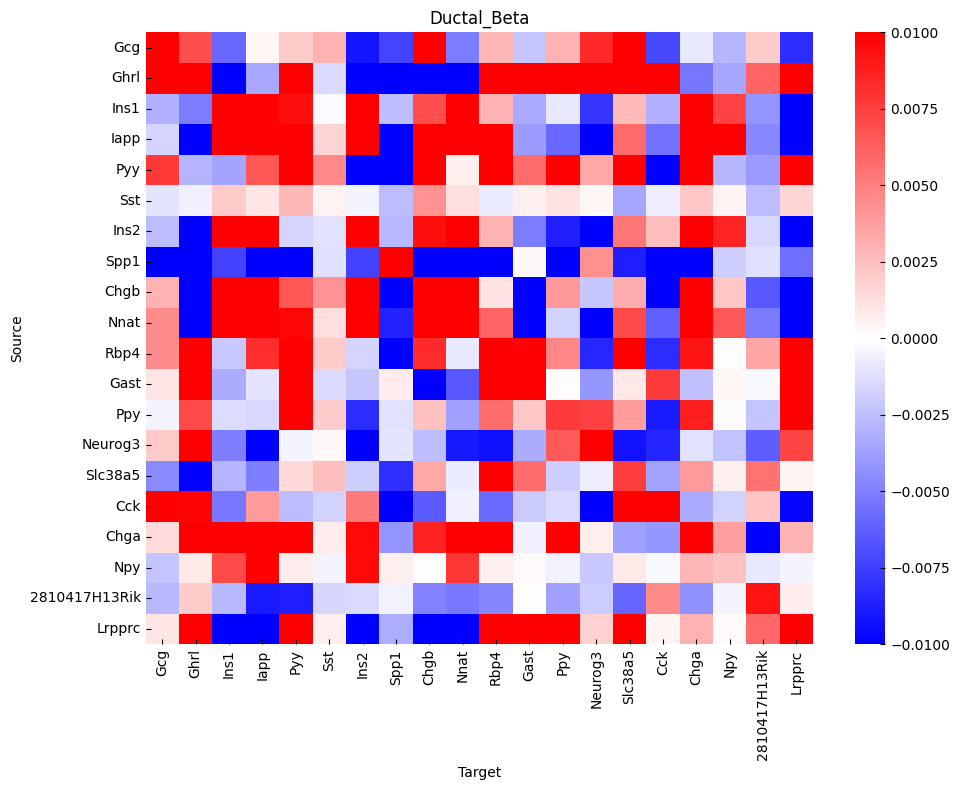

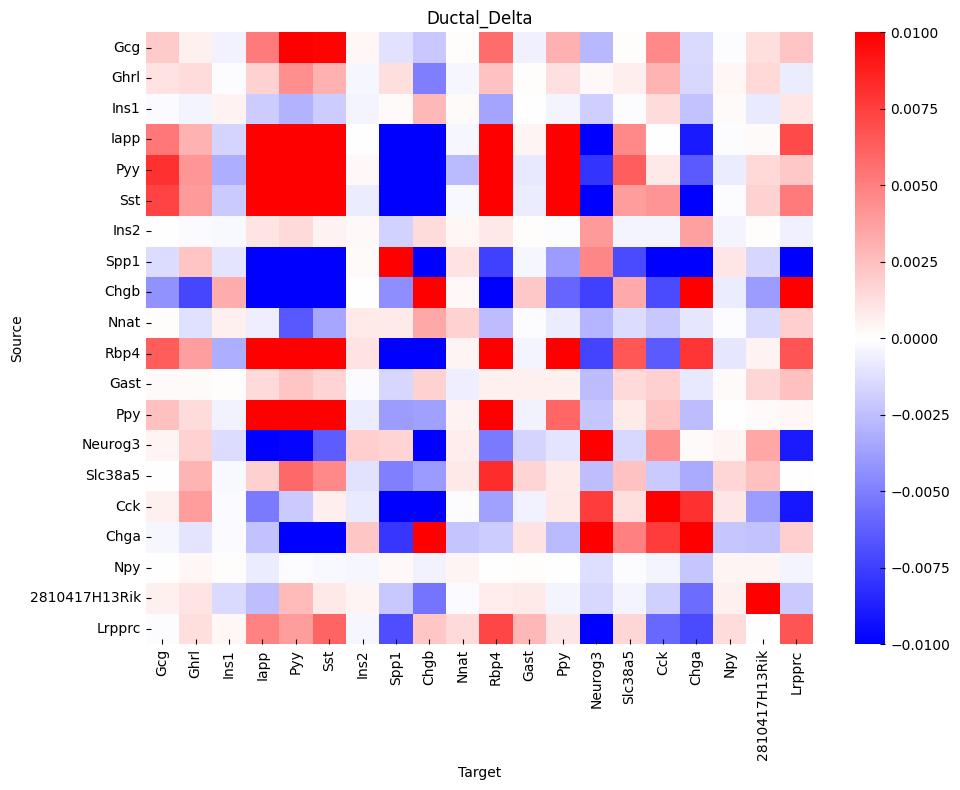

In [19]:
cellmap.view_GRN(adata,source_cluster,target_clusters,exp_key='RECODE_log')